In [24]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
import requests
from PIL import Image
import cv2

In [25]:
np.random.seed(0)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

(60000, 28, 28)
(10000, 28, 28)
60000


In [27]:
num_of_samples = []
cols = 5
num_classes = 10

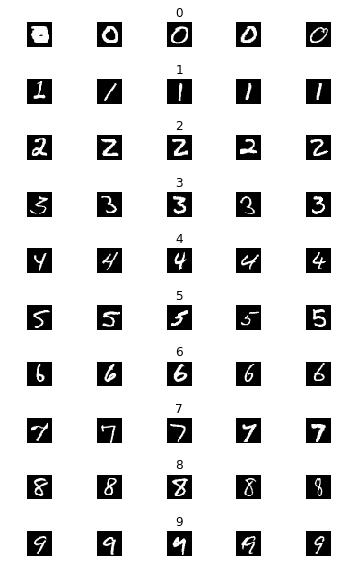

In [28]:
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

In [29]:
print(num_of_samples)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0,0.5,'Number of images')

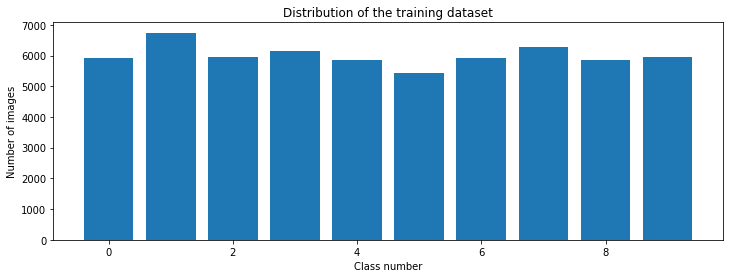

In [30]:
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [31]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [32]:
X_train = X_train/255 
X_test = X_test/255

In [33]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [34]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [35]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 30us/step - loss: 0.6263 - acc: 0.8025 - val_loss: 0.3270 - val_acc: 0.9033
Epoch 2/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.3745 - acc: 0.8885 - val_loss: 0.2911 - val_acc: 0.9137
Epoch 3/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.3358 - acc: 0.8986 - val_loss: 0.2748 - val_acc: 0.9183
Epoch 4/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.3163 - acc: 0.9031 - val_loss: 0.2584 - val_acc: 0.9208
Epoch 5/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.3071 - acc: 0.9063 - val_loss: 0.2455 - val_acc: 0.9258
Epoch 6/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2973 - acc: 0.9100 - val_loss: 0.2407 - val_acc: 0.9280
Epoch 7/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.2882 - acc: 0.9118 - val_loss: 0.2551 - val_acc:

Text(0.5,0,'epoch')

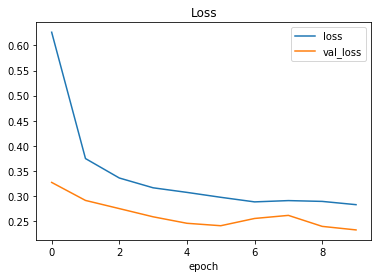

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

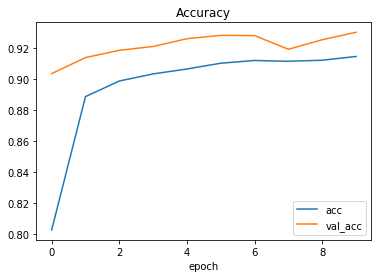

In [38]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [39]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.28964284547567365
Test accuracy: 0.9147


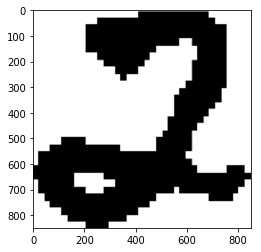

In [40]:
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

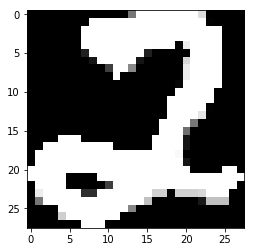

In [41]:
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [42]:
img = img/255
img = img.reshape(1, 784)

In [43]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [5]
